In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()

evo_list = os.listdir(os.path.join(cwd, 'saves', 'images', 'evolutionary'))
reinf_list = os.listdir(os.path.join(cwd, 'saves', 'images', 'reinforcement'))

In [9]:
def generate_dicts(name, files):
  files = [file for file in files if file.startswith(name)]  
  # remove png from files name
  files = [file.split('.png')[0] for file in files]
  files.sort()

  gen_time_dict = {}

  for file in files:
    file = file.split('-')
    gen = [s for s in file if s.endswith('gen')][0]
    gen = gen.split('gen')[0]
    time = [s for s in file if s.endswith('secs')][0]
    time = time.split('secs')[0]
    gen_time_dict[int(gen)] = int(time)

  gen_time_dict = dict(sorted(gen_time_dict.items()))
  return gen_time_dict

def graph_dict(gen_dict, graph_type, add=0):
  x = []
  y = []

  for gen, time in gen_dict.items():
      if gen <= 1000:
          x.append(gen)
          y.append(time)

  plt.plot(x, y, label='Duration in seconds')
  
  if graph_type == 'e':
      plt.title('Evolutionary Algorithm')
      plt.xlabel('Generation')
  else:
      plt.title('Reinforcement Learning')
      plt.xlabel('Episode')
  
  plt.ylabel('Time (secs)')
  plt.legend(loc='upper left')
  
  # Adding vertical and horizontal dashed lines at the last point
  if x and y:
      last_gen = x[-1]
      last_time = y[-1]
      plt.axvline(last_gen, color='gray', linestyle='--', linewidth=0.8)
      plt.axhline(last_time, color='gray', linestyle='--', linewidth=0.8)
      
      # Annotate total duration in hours, minutes, and seconds
      total_duration_seconds = last_time
      if add != 0:
        total_duration_seconds += add
      total_hours = total_duration_seconds // 3600
      total_minutes = (total_duration_seconds % 3600) // 60
      total_seconds = total_duration_seconds % 60
      
      # Create annotation text
      total_duration_str = f'Total Duration: {int(total_hours)}h {int(total_minutes)}m {int(total_seconds)}s'
      
      # Positioning the annotation at the last point
      plt.annotate(total_duration_str, xy=(last_gen, last_time), xytext=(last_gen * 0.5, last_time * 0.9),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
  
  plt.tight_layout()
  plt.show()

def mean_duration_per_episode(gen_dict):
  x = []
  y = []

  for gen, time in gen_dict.items():
      if gen <= 1000:
          x.append(gen)
          y.append(time)
  
  print(len(y))
  y_new = []
  for i in range(0, len(y)-1):
    y_new.append((y[i+1]-y[i])/(x[i+1]-x[i]))
  print(len(y_new))
  print(y_new)  

def mean_duration_per_episode_list(dict_list):
    all_y_new = []
    for gen_dict in dict_list:
        x = []
        y = []

        for gen, time in gen_dict.items():
            if gen <= 1000:
                x.append(gen)
                y.append(time)

        # Calculate derivative
        y_new = []
        for i in range(0, len(y)-1):
            if x[i+1] != x[i]:
                y_new.append((y[i+1] - y[i]) / (x[i+1] - x[i]))

        all_y_new.append(y_new)

    # Plotting
    labels = ['Evolutionary Algorithm', 'TD3 - Experiment 1', 'TD3 - Experiment 2', 'Experiment 4']
    colors = ['b', 'g', 'r', 'orange']  # Different colors for different datasets
    for i, y_new in enumerate(all_y_new):
        x = np.arange(0, len(y_new))*50
        plt.plot(x, y_new, label=f'{labels[i]}', color=colors[i])

    plt.xlabel('Generation/Episode')
    plt.ylabel('Derivative of Time')
    plt.title('Derivative of Time vs Number of episodes/generations')
    plt.legend()
    plt.show()

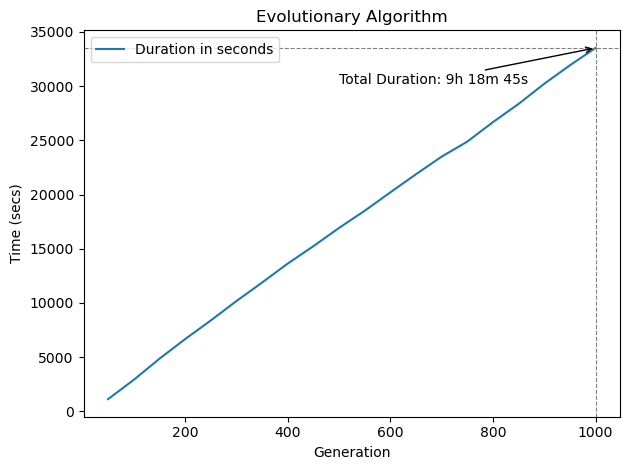

20
19
[35.54, 38.92, 36.2, 34.4, 35.86, 34.12, 35.04, 32.1, 33.68, 31.68, 33.98, 33.5, 32.46, 27.74, 35.94, 33.7, 37.14, 34.04, 32.06]


In [4]:
evo_name = '01-Evo'
evo_dict = generate_dicts(evo_name, evo_list)
graph_dict(evo_dict, 'e')
mean_duration_per_episode(evo_dict)


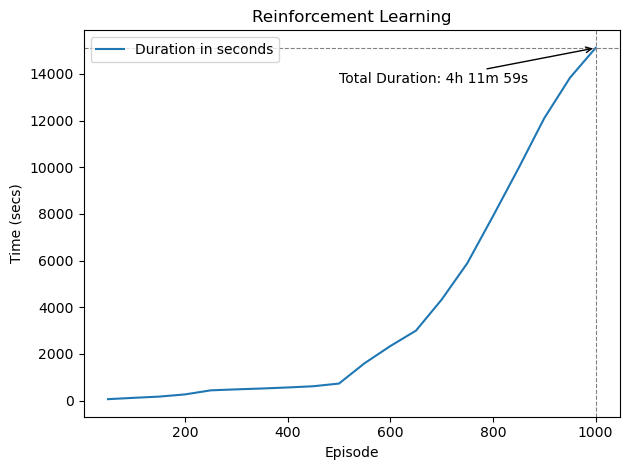

In [5]:
reinf1_name = '01-TD3'
reinf1_dict = generate_dicts(reinf1_name, reinf_list)
graph_dict(reinf1_dict, 'r')

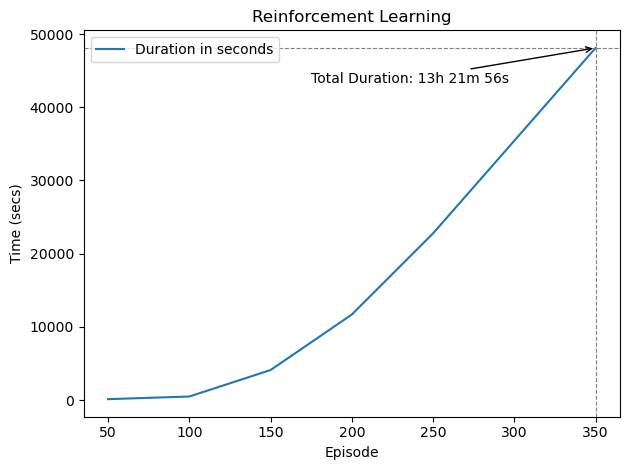

In [6]:
reinf2_name = '02-TD3'
reinf2_dict = generate_dicts(reinf2_name, reinf_list)
graph_dict(reinf2_dict, 'r')

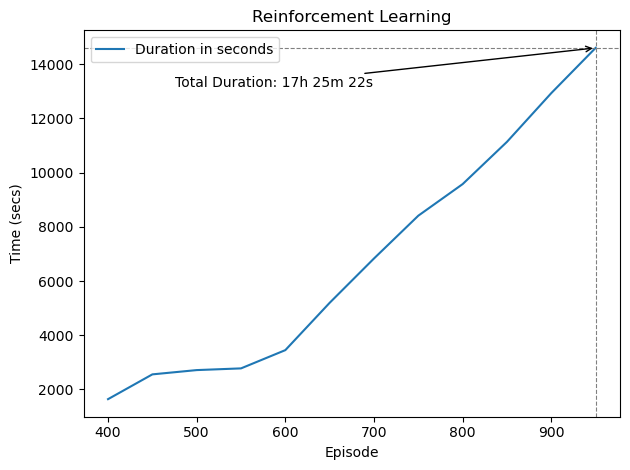

In [7]:
reinf3_name = '03-TD3'
reinf3_dict = generate_dicts(reinf3_name, reinf_list)
graph_dict(reinf3_dict, 'r', 48116)

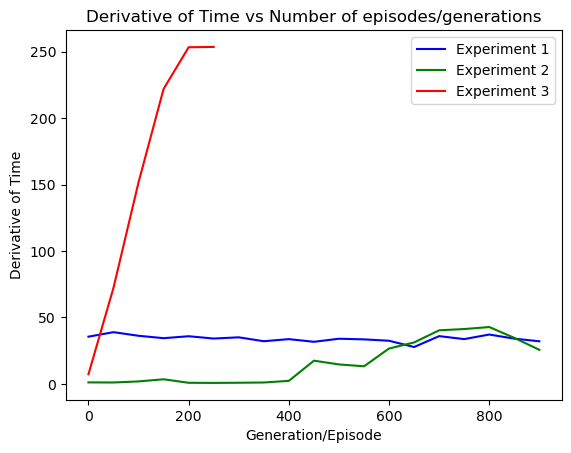

In [10]:

# Example usage:
dict1 = {10: 20, 20: 40, 30: 60, 40: 80}
dict2 = {15: 25, 25: 45, 35: 65, 45: 85, 55: 105}
dict3 = {5: 15, 15: 35, 25: 55, 35: 75}

mean_duration_per_episode_list([evo_dict, reinf1_dict, reinf2_dict])